В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels import api as sm


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [87]:
df_cars = pd.read_csv('data/cars.csv')
df_cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [88]:
df_cars.isna()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
df_cars.isnull()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
df_cars.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [18]:
df_cars.Brand.unique().tolist() #11 uniques - categories

['Toyota',
 'Honda',
 'Ford',
 'Maruti',
 'Hyundai',
 'Tata',
 'Mahindra',
 'Volkswagen',
 'Audi',
 'BMW',
 'Mercedes']

In [21]:
df_cars.Model.value_counts() #a lot of different values and they looks to be non-categorical

Model
Mustang          3
Altroz           3
C-Class          3
Verna            3
Fortuner         2
S-Cross          2
Vitara           2
WR-V             2
Ameo             2
A3               2
7 Series         2
GLE              2
Yaris            2
Ranger           2
Santro           2
Tigor            2
T-Roc            2
BR-V             2
Elantra          2
Q7               2
X5               2
GLA              2
Camry            2
Venue            2
Tiago            2
XUV300           2
Vento            2
A5               2
3 Series         2
Innova Crysta    2
Safari           2
EcoSport         2
Aspire           2
E-Class          2
X3               2
A6               2
Passat           2
Thar             2
Creta            1
Swift            1
Sonata           1
Nexon            1
Scorpio          1
Polo             1
A4               1
X1               1
Endeavour        1
City             1
Harrier          1
Ertiga           1
Civic            1
Tiguan           1
Q3    

In [24]:
df_cars.Fuel_Type.value_counts() #2 categories Petrol and Diesel

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [26]:
df_cars.Transmission.value_counts() #categories Automatic and Manual

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [27]:
df_cars.Owner_Type.value_counts() #categories First Second Third

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

В наборі даних 8 числових і 5 категоріальних колонок, проте колонку Owner_Type можна перетворити на числову (скільки було власників - число) з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, в яких можна встановити відношення порядку - кількість власників

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [91]:
inputColumns = ['Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 
                'Mileage', 'Engine', 'Power', 'Seats']
target = ['Price']
X_train, X_test, Y_train, Y_test = train_test_split(df_cars[inputColumns], df_cars[target], test_size=0.2, random_state=12)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [94]:
np.where(X_test['Transmission']=='Automatic', 1, 0)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [95]:
X_test['Fuel_Type_Code'] = np.where(X_test['Fuel_Type']=='Petrol', 1, 0)
X_train['Fuel_Type_Code'] = np.where(X_train['Fuel_Type']=='Petrol', 1, 0)
df_cars['Transmission'].value_counts()
X_test['Transmission'] = np.where(X_test['Transmission']=='Automatic', 1, 0)
X_train['Transmission'] = np.where(X_train['Transmission']=='Automatic', 1, 0)
Encoder = preprocessing.OneHotEncoder()
Encoder.fit(X_train[['Brand']])
one_hot_train = Encoder.transform(X_train[['Brand']]).toarray()
X_train[Encoder.categories_[0]] = one_hot_train
one_hot_test = Encoder.transform(X_test[['Brand']]).toarray()
X_test[Encoder.categories_[0]] = one_hot_test

In [96]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [97]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,1,Second,18,1498,148,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,1,First,17,1968,187,5,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,1,First,15,1984,241,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,0,Second,18,1598,103,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,1,Second,12,1991,241,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,1,Second,15,1395,148,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,0,Third,20,1086,68,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,0,Second,18,1598,103,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,0,First,19,1462,103,7,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,0,Third,20,1194,94,5,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [101]:
corrDf = pd.concat([X_train.select_dtypes(include='number'), Y_train], axis=1).corr()
corrDf['abs_corr'] = np.abs(corrDf['Price'])
corrDf['abs_corr'].sort_values()

Seats                0.000979
Ford                 0.004592
Toyota               0.023778
Kilometers_Driven    0.083951
Fuel_Type_Code       0.110782
Volkswagen           0.158742
Mahindra             0.178627
Honda                0.209779
Year                 0.233769
Maruti               0.249737
Hyundai              0.263022
Owner_Type_Codes     0.265537
Audi                 0.328858
Tata                 0.341815
Mercedes             0.431606
BMW                  0.477522
Mileage              0.638404
Transmission         0.680731
Engine               0.710561
Power                0.849137
Price                1.000000
Name: abs_corr, dtype: float64

Бачимо, що з колонкою price найкраще корелюють такі змінні Mileage, Transmission, Engine, Power

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [111]:
columns_to_drop = X_train.select_dtypes(exclude='number')
X_train.drop(columns_to_drop, axis=1, inplace=True)
X_train.head()

,Year,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,2019,22000,1,18,1498,148,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,1,17,1968,187,5,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,1,15,1984,241,5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,0,18,1598,103,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,1,12,1991,241,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [112]:
X_test.drop(columns_to_drop, axis=1, inplace=True)

In [118]:
linearModel = LinearRegression()
linearModel.fit(X_train, Y_train)
Y_train_predicted = linearModel.predict(X_train)
Y_test_predicted = linearModel.predict(X_test)
rmse_train = mean_squared_error(Y_train, Y_train_predicted, squared=False)
rmse_test = mean_squared_error(Y_test, Y_test_predicted, squared=False)

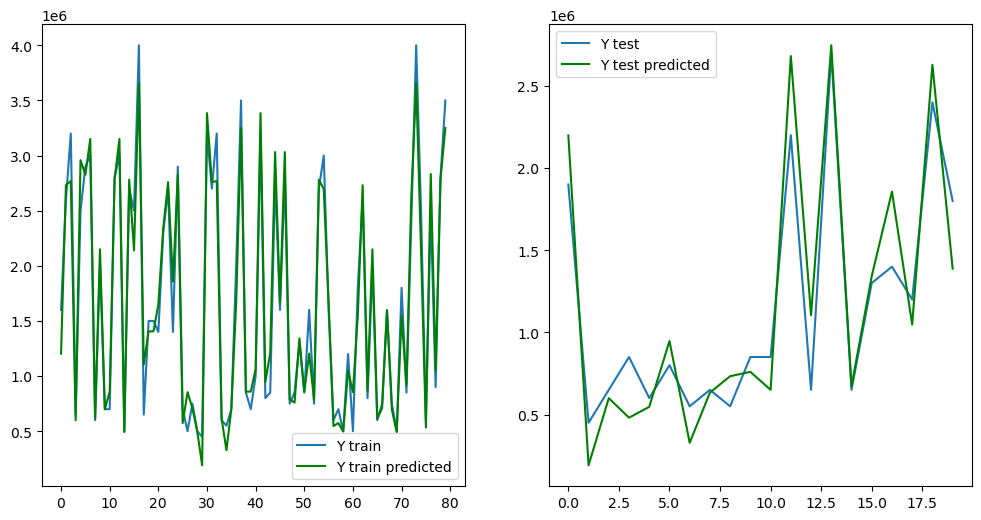

In [147]:
x_count_train = Y_train.shape[0]
x_plot_train= list(range(x_count_train))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_plot_train, Y_train,  label='Y train')
plt.plot(x_plot_train, Y_train_predicted, color='green', label='Y train predicted')
plt.legend()
plt.subplot(1, 2, 2)
x_count_test = Y_test.shape[0]
x_plot_test= list(range(x_count_test))
plt.plot(x_plot_test, Y_test, label='Y test')
plt.plot(x_plot_test, Y_test_predicted, color='green', label='Y test predicted')
plt.legend()
plt.show()


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [199]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
linearModelScaled = LinearRegression()
linearModelScaled.fit(X_train_scaled, Y_train)
coefs = linearModelScaled.coef_
intercept = linearModelScaled.intercept_
Y_train_predicted_scaled = linearModelScaled.predict(X_train_scaled)

In [252]:
diff = Y_train_predicted_scaled - Y_train_predicted
diff

array([[-1.53668225e-08],
       [-2.88709998e-08],
       [-4.37721610e-08],
       [ 1.60653144e-08],
       [-8.75443220e-08],
       [-4.19095159e-08],
       [-8.19563866e-08],
       [ 2.56113708e-08],
       [ 3.39932740e-08],
       [ 2.40979716e-08],
       [-2.08383426e-08],
       [-3.58559191e-08],
       [-8.19563866e-08],
       [ 3.23634595e-08],
       [-1.03376806e-07],
       [ 1.11758709e-08],
       [-1.16415322e-07],
       [-1.86264515e-09],
       [ 5.12227416e-09],
       [ 5.12227416e-09],
       [ 8.75443220e-08],
       [-2.60770321e-08],
       [-4.28408384e-08],
       [-3.25962901e-09],
       [-4.19095159e-08],
       [ 1.39698386e-08],
       [-4.65661287e-09],
       [ 3.53902578e-08],
       [ 1.32014975e-07],
       [ 5.14555722e-08],
       [-9.26665962e-08],
       [-4.28408384e-08],
       [-4.37721610e-08],
       [ 2.56113708e-08],
       [ 5.21540642e-08],
       [ 2.40979716e-08],
       [-1.90921128e-08],
       [-8.56816769e-08],
       [ 2.6

Бачимо, що різниця в обчисленнях таргетів для заскейлених параметрів і незаскейлених дуже маленька

In [167]:
coefsDF = pd.DataFrame({'feature':X_train.columns, 'value':coefs[0]})

In [171]:
coefsDF.sort_values(by='value')

,feature,value
7,Fuel_Type_Code,-185245.840763
12,Hyundai,-151916.052473
13,Mahindra,-140931.632855
3,Mileage,-131884.633123
10,Ford,-119069.155830
14,Maruti,-112786.673613
1,Kilometers_Driven,-99713.958682
18,Volkswagen,-93391.358093
16,Tata,-65558.490423
11,Honda,-63112.339850


З огляду на коефіцієнти
1. Бензин зменшує ціну, дизель коштує дорожче (це ринкова особливість)
2. Kilometers_Driven - чим більше значення - тим менша ціна - теж логічно
3. Рік - не зовсім логічно, бо чим старіша машина - тим вона повинна б бути дешевша (якщо це не вінтаж)
4. Кількість місць впливає найменше
5. Марки тойота, ауді, вмв та мерседес коштують дорожче
6. Owner_Type_Codes - щось не логічно виходить, бо на мою думку він мав би зменшувати ціну
7. Transmission - прямо впливає на вартість - згодна
8. Power - впливає найбільше

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [289]:
y = Y_train['Price']
x = X_train.reset_index()


In [290]:
sm_model = sm.OLS(y, x)
sm_results = sm_model.fit()

In [291]:
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Tue, 28 May 2024   Prob (F-statistic):           2.01e-33
Time:                        20:53:41   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
index               198.4165   1193.820      0.166      0.869   -2190.412    2587.245
Year              -7821.1909   5.43e+04     -0.144      0.886   -1.17e+05    1.01e+05
Kilometers_Driven   -10.2948      7.104     -1.449      0.153     -24.509       3.920
Transmission       2.395e+05   9.03e+04      2.653      0.010    5.89e+04     4.2e+05
Mileage           -3.862e+04   1.71e+04     -2.259      0.028   -7.28e+04   -4408.773
Engine              -32.5523    110.982     -0.293      0.770    -254.627     189.523
Power              6101.0713    926.123      6.588      0.000    4247.904    7954.239
Seats             -2899.2570   5.69e+04     -0.051      0.960   -1.17e+05    1.11e+05
Fuel_Type_Code    -3.678e+05   9.14e+04     -4.026      0.000   -5.51e+05   -1.85e+05
Audi               1.814e+07    1.1e+08      0.165      0.870   -2.02e+08    2.38e+08
BMW                1.812e+07    1.1e+08      0.165      0.870   -2.02e+08    2.38e+08
Ford               1.709e+07    1.1e+08      0.155      0.877   -2.03e+08    2.37e+08
Honda               1.72e+07    1.1e+08      0.156      0.876   -2.03e+08    2.37e+08
Hyundai            1.688e+07    1.1e+08      0.153      0.879   -2.03e+08    2.37e+08
Mahindra           1.681e+07    1.1e+08      0.153      0.879   -2.03e+08    2.37e+08
Maruti               1.7e+07    1.1e+08      0.154      0.878   -2.03e+08    2.37e+08
Mercedes           1.812e+07    1.1e+08      0.165      0.870   -2.02e+08    2.38e+08
Tata               1.726e+07    1.1e+08      0.157      0.876   -2.03e+08    2.37e+08
Toyota             1.751e+07    1.1e+08      0.159      0.874   -2.03e+08    2.38e+08
Volkswagen         1.713e+07    1.1e+08      0.156      0.877   -2.03e+08    2.37e+08
Owner_Type_Codes   6.476e+04   7.26e+04      0.892      0.376   -8.06e+04     2.1e+05
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.311
Skew:                           0.104   Prob(JB):                        0.856
Kurtosis:                       2.776   Cond. No.                     3.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> При використанні нескейлкених даних результат виглядає адекватним і значущими є Transmission, Mileage, Power, Fuel_Type_Code
Коли я передавала в модель дані після скейлу (X_train_scaled) - всі параметри виглядали незначущими а прогнозований таргет був некоректним

In [278]:
sm_results.params

index                1.984165e+02
Year                -7.821191e+03
Kilometers_Driven   -1.029478e+01
Transmission         2.395294e+05
Mileage             -3.861713e+04
Engine              -3.255226e+01
Power                6.101071e+03
Seats               -2.899257e+03
Fuel_Type_Code      -3.678110e+05
Audi                 1.814465e+07
BMW                  1.811887e+07
Ford                 1.708521e+07
Honda                1.720007e+07
Hyundai              1.688107e+07
Mahindra             1.681261e+07
Maruti               1.699555e+07
Mercedes             1.812407e+07
Tata                 1.725976e+07
Toyota               1.751200e+07
Volkswagen           1.713030e+07
Owner_Type_Codes     6.476399e+04
dtype: float64

In [279]:
Y_train_predicted_OSM = sm_results.predict(x)
Y_train_predicted_OSM

0     1.210371e+06
1     2.729522e+06
2     2.762128e+06
3     5.999790e+05
4     2.948956e+06
          ...     
75    5.261848e+05
76    2.827076e+06
77    1.055335e+06
78    2.777405e+06
79    3.257009e+06
Length: 80, dtype: float64

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [280]:
x_valuable = x[['Transmission', 'Mileage', 'Power', 'Fuel_Type_Code']]
sm_result_valuable_model = sm.OLS(y, x_valuable)
sm_result_valuable_result = sm_result_valuable_model.fit()

In [269]:
sm_result_valuable_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              324.1
Date:                Tue, 28 May 2024   Prob (F-statistic):                    6.51e-47
Time:                        20:31:04   Log-Likelihood:                         -1157.4
No. Observations:                  80   AIC:                                      2323.
Df Residuals:                      76   BIC:                                      2332.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Transmission    5.665e+05   1.35e+05      4.189      0.000    2.97e+05    8.36e+05
Mileage        -1953.5613   5726.792     -0.341      0.734   -1.34e+04    9452.333
Power           9118.9853    712.046     12.807      0.000    7700.823    1.05e+04
Fuel_Type_Code -3.214e+05   1.06e+05     -3.023      0.003   -5.33e+05    -1.1e+05
==============================================================================
Omnibus:                       15.704   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.028
Skew:                          -1.007   Prob(JB):                     0.000122
Kurtosis:                       4.161   Cond. No.                         475.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 і Adjusted R2 зменшилися, а це означає, що навіть малозначущі параметри моделі впливають на її точність

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [281]:
x_valuable2 = x[['Transmission', 'Mileage', 'Power', 'Fuel_Type_Code', 'Kilometers_Driven']]
x_valuable2.reset_index(inplace=True)
sm_result_valuable_model = sm.OLS(y, x_valuable2)
sm_result_valuable_result = sm_result_valuable_model.fit()

In [282]:
sm_result_valuable_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              217.4
Date:                Tue, 28 May 2024   Prob (F-statistic):                    6.68e-45
Time:                        20:44:52   Log-Likelihood:                         -1156.1
No. Observations:                  80   AIC:                                      2324.
Df Residuals:                      74   BIC:                                      2339.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
index             -3013.6938   2355.427     -1.279      0.205   -7706.984    1679.597
Transmission       5.694e+05   1.35e+05      4.210      0.000       3e+05    8.39e+05
Mileage            8605.8366   9686.930      0.888      0.377   -1.07e+04    2.79e+04
Power              9429.2835    764.965     12.326      0.000    7905.057     1.1e+04
Fuel_Type_Code    -3.455e+05   1.09e+05     -3.165      0.002   -5.63e+05   -1.28e+05
Kilometers_Driven    -3.6975      5.310     -0.696      0.488     -14.278       6.883
==============================================================================
Omnibus:                       14.355   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.803
Skew:                          -0.973   Prob(JB):                     0.000370
Kurtosis:                       3.979   Cond. No.                     7.62e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Висновок
 > На мою думку найточнішою є перша модель з врахуванням всіх ознак, я б використовувала саме її (в неї найбільший R2 і adj_R2)

####  OLS на scaled даних

In [297]:
y_scaled = Y_train['Price']
x_scaled = X_train_scaled.reset_index()
scaled_model_osm = sm.OLS(y_scaled, x_scaled)
scaled_model_osm_results = scaled_model_osm.fit()
scaled_model_osm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              16.43
Date:                Tue, 28 May 2024   Prob (F-statistic):                    2.24e-17
Time:                        21:00:47   Log-Likelihood:                         -1198.4
No. Observations:                  80   AIC:                                      2437.
Df Residuals:                      60   BIC:                                      2484.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
index       3.401e+04   2260.750     15.044      0.000    2.95e+04    3.85e+04
0          -2.737e+05   2.14e+05     -1.277      0.207   -7.02e+05    1.55e+05
1          -3.916e+05   2.08e+05     -1.880      0.065   -8.08e+05    2.51e+04
2          -1.133e+05   1.58e+05     -0.718      0.476   -4.29e+05    2.02e+05
3           -4.03e+05   2.14e+05     -1.885      0.064   -8.31e+05    2.48e+04
4          -5.024e+05   2.58e+05     -1.946      0.056   -1.02e+06    1.41e+04
5            7.26e+05   2.67e+05      2.722      0.008    1.93e+05    1.26e+06
6           1.426e+05   1.54e+05      0.924      0.359   -1.66e+05    4.51e+05
7          -2.034e+05   1.64e+05     -1.240      0.220   -5.32e+05    1.25e+05
8           3.157e+05   1.11e+05      2.840      0.006    9.33e+04    5.38e+05
9           2.001e+05   1.16e+05      1.719      0.091   -3.28e+04    4.33e+05
10         -1.963e+05   1.22e+05     -1.611      0.112    -4.4e+05    4.74e+04
11         -1.324e+05   1.25e+05     -1.055      0.296   -3.83e+05    1.19e+05
12         -1.123e+05   1.06e+05     -1.061      0.293   -3.24e+05    9.93e+04
13          -1.64e+05   1.09e+05     -1.511      0.136   -3.81e+05    5.31e+04
14         -1.025e+05   1.06e+05     -0.969      0.336   -3.14e+05    1.09e+05
15          2.682e+05   1.14e+05      2.360      0.022    4.09e+04    4.96e+05
16         -1.895e+05   1.44e+05     -1.315      0.194   -4.78e+05    9.88e+04
17          2.515e+04    1.2e+05      0.209      0.835   -2.15e+05    2.66e+05
18         -1.189e+04   1.09e+05     -0.109      0.914   -2.31e+05    2.07e+05
19           -9.3e+04   1.72e+05     -0.539      0.592   -4.38e+05    2.52e+05
==============================================================================
Omnibus:                        3.302   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.058
Skew:                           0.163   Prob(JB):                        0.357
Kurtosis:                       2.285   Cond. No.                     1.76e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [298]:
y_scaled = scaled_model_osm_results.predict(x_scaled)
print(y_scaled)

0    -2.759887e+05
1     1.495933e+06
2     1.828477e+06
3    -3.577611e+05
4     2.229493e+06
          ...     
75    7.457267e+05
76    2.759259e+06
77    1.448468e+06
78    3.426861e+06
79    3.853879e+06
Length: 80, dtype: float64


а зараз не всі p-value такі великі, як в моїх попередніх експериментах, але предіктед дані дивні 